In [1]:
import pandas as pd

# Load the data from the CSV file
file_path = '/mnt/data/FDI data.csv'
data = pd.read_csv("FDI Data.csv")

# Display the first few rows of the dataset and summary information
data_head = data.head()
data_info = data.info()
data_description = data.describe()

data_head, data_info, data_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sector   63 non-null     object 
 1   2000-01  63 non-null     float64
 2   2001-02  63 non-null     float64
 3   2002-03  63 non-null     float64
 4   2003-04  63 non-null     float64
 5   2004-05  63 non-null     float64
 6   2005-06  63 non-null     float64
 7   2006-07  63 non-null     float64
 8   2007-08  63 non-null     float64
 9   2008-09  63 non-null     float64
 10  2009-10  63 non-null     float64
 11  2010-11  63 non-null     float64
 12  2011-12  63 non-null     float64
 13  2012-13  63 non-null     float64
 14  2013-14  63 non-null     float64
 15  2014-15  63 non-null     float64
 16  2015-16  63 non-null     float64
 17  2016-17  63 non-null     float64
dtypes: float64(17), object(1)
memory usage: 9.0+ KB


(                     Sector  2000-01  2001-02  2002-03  2003-04  2004-05  \
 0  METALLURGICAL INDUSTRIES    22.69    14.14    36.61     8.11   200.38   
 1                    MINING     1.32     6.52    10.06    23.48     9.92   
 2                     POWER    89.42   757.44    59.11    27.09    43.37   
 3   NON-CONVENTIONAL ENERGY     0.00     0.00     1.70     4.14     1.27   
 4           COAL PRODUCTION     0.00     0.00     0.00     0.04     0.00   
 
    2005-06  2006-07  2007-08  2008-09  2009-10  2010-11  2011-12  2012-13  \
 0   149.13   169.94  1175.75   959.94   419.88  1098.14  1786.14  1466.23   
 1     7.40     6.62   444.36    34.16   174.40    79.51   142.65    57.89   
 2    72.69   157.15   988.68   907.66  1271.79  1271.77  1652.38   535.68   
 3     1.35     2.44    58.82   125.88   622.52   214.40   452.17  1106.52   
 4     9.14     1.30    14.08     0.22     0.00     0.00     0.00     0.00   
 
    2013-14  2014-15  2015-16  2016-17  
 0   567.63   359.34   45

The dataset contains 63 rows and 18 columns, with the following structure:

Sector: The sector of the economy.
2000-01 to 2016-17: Annual Foreign Direct Investment (FDI) values in million dollars for each fiscal year.

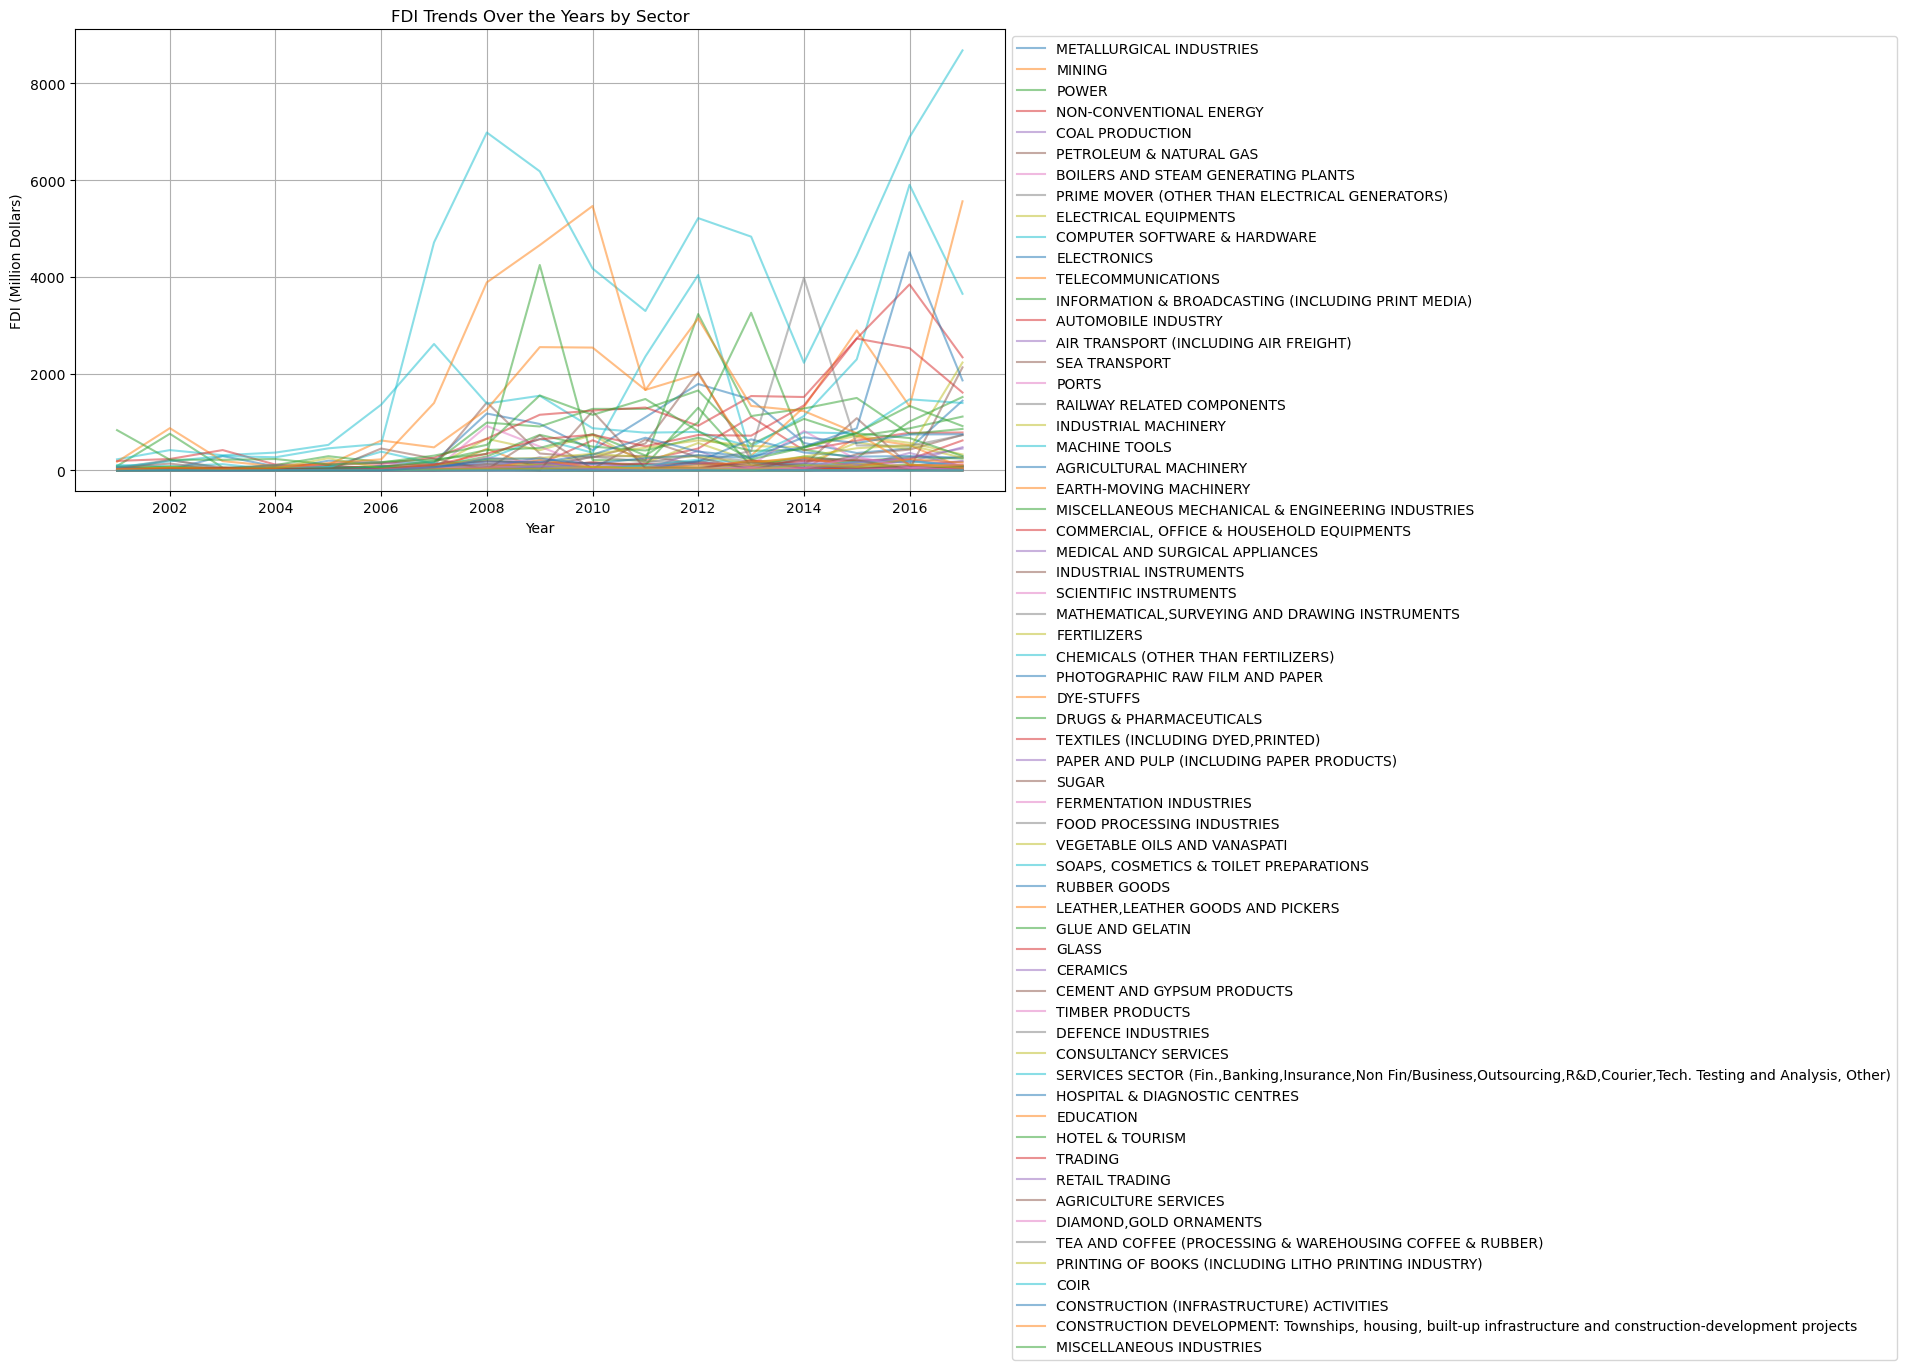

In [2]:
# Let's start with the Exploratory Data Analysis. First, we'll visualize the overall trend of FDI over the years across all sectors.

import matplotlib.pyplot as plt

# Reshape data for easier plotting
data_long = pd.melt(data, id_vars=['Sector'], var_name='Year', value_name='FDI')

# Convert 'Year' to datetime for better plotting
data_long['Year'] = pd.to_datetime(data_long['Year'], format='%Y-%y')

# Plot overall trend of FDI over the years
plt.figure(figsize=(12, 6))
for sector in data['Sector'].unique():
    sector_data = data_long[data_long['Sector'] == sector]
    plt.plot(sector_data['Year'], sector_data['FDI'], label=sector, alpha=0.5)

plt.title('FDI Trends Over the Years by Sector')
plt.xlabel('Year')
plt.ylabel('FDI (Million Dollars)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


The plot shows the trends of Foreign Direct Investment (FDI) over the years for different sectors. Here are some observations:
Power and Metallurgical Industries: These sectors have seen significant spikes in FDI over the years.
Non-Conventional Energy: There's a notable increase in FDI starting around 2008-09.
Mining: There are a few peaks, but the FDI generally remains lower compared to other sectors.
Coal Production: This sector has minimal FDI compared to others.

In [8]:
# Calculate average FDI per sector
average_fdi_per_sector = data.drop(columns='Sector').mean(axis=1)
average_fdi_per_sector.index = data['Sector']
average_fdi_per_sector.sort_values(ascending=False, inplace=True)

# Calculate total FDI per year
total_fdi_per_year = data.drop(columns='Sector').sum(axis=0)

# Prepare data for PowerBI/Tableau
# saving the transformed data in csv format
data_long.to_csv("C:\\Users\\LENOVO\\Downloads\\TransfData.csv", index=False)

average_fdi_per_sector.head(), total_fdi_per_year.head(), total_fdi_per_year.idxmax(), total_fdi_per_year.idxmin()


(Sector
 SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)    3498.617059
 COMPUTER SOFTWARE & HARDWARE                                                                                           1451.146471
 CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects            1429.005294
 TELECOMMUNICATIONS                                                                                                     1408.588824
 AUTOMOBILE INDUSTRY                                                                                                     980.818824
 dtype: float64,
 2000-01    2378.71
 2001-02    4027.69
 2002-03    2704.32
 2003-04    2187.85
 2004-05    3218.69
 dtype: float64,
 '2016-17',
 '2003-04')